In [31]:
import pandas as pd

In [32]:
df = pd.read_csv("Auto.csv")

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


What are the *features*?

* cylinders: number of cylinders in a car
* displacement: displacement of the car engine
* horsepower: horsepower of the car
* weight: weight of the car in pounds
* acceleration: acceleration of the car
* year: year of the car
* origin: car company represented as number

What is the *response*?
* mpg: The number of miles per gallon you can expect from the car

In [34]:
df.shape

(397, 9)

### Questions about the Auto data

* Is there a relationship between the features/characteristics of the car and the miles per gallon(mpg)
* How strong is that relationship?
* What features most contribute to mpg?
* What is the effect of each feature of the car on the mpg?
* Given the list of features, can we predict the mileage of the cars?

### Linear Regression in scikit-learn

In [35]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

#### Cleaning the data set

Notice that the horsepower feature has '?' for some of the rows. We will need to provide some numerical values to these cells

In [36]:
df.drop(df[df['horsepower']=='?'].index, inplace=True)

#### Splitting into features and response variable

In [37]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]

In [38]:
y = df['mpg']

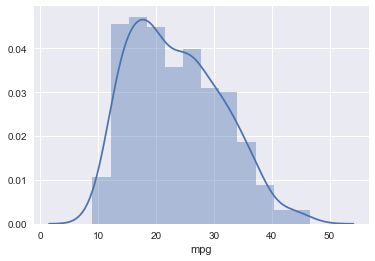

In [39]:
import seaborn as sns
%matplotlib inline
sns.distplot(y)

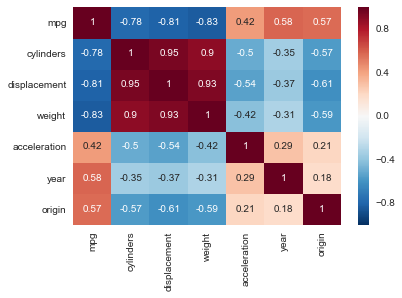

In [40]:
sns.heatmap(df.corr(), annot=True)

#### Splitting the data set into training set and the test set

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Creating and training the model

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lm.coef_

array([-0.4361437 ,  0.02124512, -0.00595217, -0.0070771 ,  0.17349795,
        0.79005957,  1.26057866])

In [45]:
lm.intercept_

-21.315312086788918

In [46]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [47]:
pd.DataFrame(lm.coef_, X_train.columns, columns=["Coeff"])

,Coeff
cylinders,-0.436144
displacement,0.021245
horsepower,-0.005952
weight,-0.007077
acceleration,0.173498
year,0.790060
origin,1.260579


In [48]:
predictions = lm.predict(X_test)

In [49]:
import matplotlib.pyplot as plt

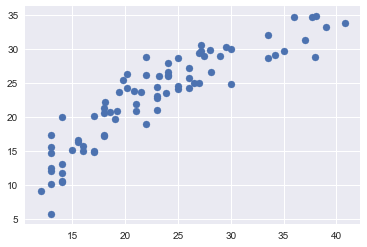

In [50]:
plt.scatter(y_test, predictions)

In [51]:
%matplotlib inline

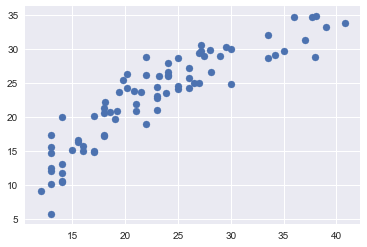

In [52]:
plt.scatter(y_test, predictions)

In [53]:
lm.score(X_test, y_test) # calculate the R-squared

0.80148042574254419

In [54]:
df_new = X_test

In [55]:
df_new['Actual Response'] = y_test

/Users/apadmanabhan/anaconda2/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
df_new['Predicted Response'] = predictions

/Users/apadmanabhan/anaconda2/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [57]:
df_new

,cylinders,displacement,horsepower,weight,acceleration,year,origin,Actual Response,Predicted Response
39,8,400.0,175,4464,11.5,71,1,14.0,10.409826
285,8,305.0,130,3840,15.4,79,1,17.0,20.072615
164,6,231.0,110,3039,15.0,75,1,21.0,21.930925
220,4,85.0,70,1945,16.8,77,3,33.5,32.095429
163,6,225.0,95,3785,19.0,75,1,18.0,17.307213
200,6,250.0,78,3574,21.0,76,1,18.0,20.569851
54,4,72.0,69,1613,18.0,71,3,35.0,29.642632
227,6,225.0,100,3630,17.7,77,1,19.0,19.728974
257,6,232.0,90,3210,17.2,78,1,19.4,23.612904
57,4,113.0,95,2278,15.5,72,3,24.0,26.008970


#### Calculate Regression Evaluation Metrics

In [58]:
from sklearn import metrics

In [59]:
metrics.mean_absolute_error(y_test, predictions) #Mean Absolute Error

2.6201724292173711

In [60]:
metrics.mean_squared_error(y_test, predictions) #Mean Squared Error

10.819837191236575

In [61]:
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, predictions)) #Root Mean Squared Error

3.2893520929259874

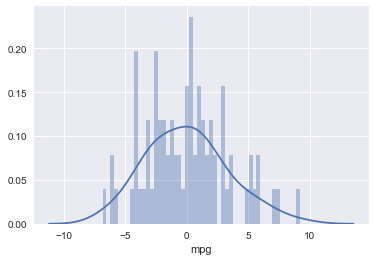

In [62]:
sns.distplot((y_test-predictions),bins=50)